# **Problem statement**

# This project predicts whether a loan will be approved or rejected based on borrower details like age, income, and credit score. It helps banks automate loan decisions, reduce defaults, and improve profitability.

# **Description of the Dataset:**  
The dataset contains loan application details used for predicting loan approval. Below is a summary of the dataset's structure:  

### **Number of Samples:**  
Contains approximately 45,000 records of loan applicants.  

### **Number of Features:**  
14 columns (13 features and 1 target variable).  

### **Features:**  
1. **Borrower Details:**  
   - `person_age`: Age of the applicant.  
   - `person_gender`: Gender of the applicant (male/female).  
   - `person_education`: Education level (e.g., High School, Bachelor, Master).  
   - `person_income`: Annual income of the applicant.  
   - `person_emp_exp`: Years of employment experience.  
   - `person_home_ownership`: Homeownership status (e.g., Rent, Own, Mortgage).  

2. **Loan Details:**  
   - `loan_amnt`: Loan amount requested.  
   - `loan_intent`: Purpose of the loan (e.g., Medical, Education, Personal).  
   - `loan_int_rate`: Interest rate of the loan.  
   - `loan_percent_income`: Loan amount as a percentage of annual income.  

3. **Credit History:**  
   - `cb_person_cred_hist_length`: Length of credit history (in years).  
   - `credit_score`: Credit score of the applicant.  
   - `previous_loan_defaults_on_file`: Previous loan defaults (Yes/No).  

4. **Outcome (Target Variable):**  
   - `loan_status`: Indicates loan approval (1 = Approved, 0 = Rejected).  

### **Use Cases:**  
- Predict whether a loan application will be approved or rejected based on borrower and loan characteristics.  

### **Dataset Purpose:**  
- Supports risk assessment and decision-making for loan approvals in financial institutions.


# **Objective of problems**

# The newly uploaded dataset contains 45,000 entries with 14 columns. Here's an overview of the dataset:
# Columns:

  person_age: Age of the person (numerical).
    person_gender: Gender of the person (categorical: male/female).
    person_education: Education level (categorical: e.g., High School, Bachelor, Master).
    person_income: Annual income of the person (numerical).
    person_emp_exp: Years of employment experience (numerical).
    person_home_ownership: Home ownership status (categorical: e.g., RENT, OWN, MORTGAGE).
    loan_amnt: Amount of the loan applied for (numerical).
    loan_intent: Purpose of the loan (categorical: e.g., PERSONAL, EDUCATION, MEDICAL).
    loan_int_rate: Interest rate on the loan (numerical).
    loan_percent_income: Percentage of income used for the loan (numerical).
    cb_person_cred_hist_length: Length of credit history (numerical).
    credit_score: Credit score of the person (numerical).
    previous_loan_defaults_on_file: Whether the person has previous loan defaults (categorical: Yes/No).
    loan_status: The target variable indicating if the loan was approved (1) or denied (0).

# Next steps you can take:

   Preprocessing: Handle missing values, encode categorical features (e.g., person_gender, person_home_ownership), and scale numerical features.
    Exploratory Data Analysis (EDA): Visualize distributions, correlations, and relationships between features and the target variable.
    Model Building: Train machine learning models (e.g., RandomForestClassifier, LogisticRegression) and evaluate their performance.

# 1. **Understanding_Data**


# 1. Importing Libraries:

   Objective: To load the necessary libraries that provide functions for data manipulation (pandas, numpy), visualizations (matplotlib, seaborn), and machine learning tasks (sklearn, imbalanced-learn). These libraries will be used throughout the project for data analysis, model training, and evaluation.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder



# The dataset is loaded using pd.read_csv


# To load the loan dataset from a .csv file into a DataFrame for analysis and modeling.


In [3]:
df=pd.read_csv("loan_data.csv")


# First 5 rows


# .head(): Quickly view the first few rows to understand the structure.

In [4]:
df.head(5)


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


# Showing this dataset information

# .info(): Check column data types, identify missing values, and memory usage

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

#provides descriptive statistics of the dataset.


# df.describe(): Get an overview of numerical statistics (e.g., mean, min, max, etc.).

In [6]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


# 2. Data Cleaning


#checks for duplicate rows.



# Duplicate rows may bias the model, so identifying and removing them ensures clean data.

In [7]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
44995,False
44996,False
44997,False
44998,False


# checks for missing values in each column.


# Missing values can lead to errors or incorrect predictions. Knowing where they exist helps decide on handling strategies (e.g., imputation or removal).

In [8]:
df.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


# mapping

Objective: Convert the person_gender column into binary values (1 for male, 0 for female).

Use: This manual encoding allows categorical data to be represented numerically, which is necessary for machine learning algorithms that require numeric input.

In [9]:
x=[]
for i in df['person_gender']:
  if i=='male':
    x.append(1)
  else:
    x.append(0)
df['person_gender']=x

Objective: Convert the previous_loan_defaults_on_file column into binary values (1 for Yes, 0 for No).

Use: Similar to the previous encoding step, this prepares the previous_loan_defaults_on_file column for use in machine learning models by converting it to a numerical format.

In [10]:
x=[]
for i in df['previous_loan_defaults_on_file']:
  if i=='Yes':
    x.append(1)
  else:
    x.append(0)
df['previous_loan_defaults_on_file']=x

# labelencoding

Objective: Convert categorical features (person_education, person_home_ownership, loan_intent) into numeric values.

Use: LabelEncoder is a utility that converts categorical text labels into integers. This is necessary for machine learning algorithms to process categorical data.

In [11]:
le = LabelEncoder()

df['person_education']=le.fit_transform(df['person_education'])
df['person_home_ownership']=le.fit_transform(df['person_home_ownership'])
df['loan_intent']=le.fit_transform(df['loan_intent'])


In [12]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,4,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0,1
1,21.0,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1,0
2,25.0,0,3,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0,1
3,23.0,0,1,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0,1
4,24.0,1,4,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,0,47971.0,6,3,15000.0,3,15.66,0.31,3.0,645,0,1
44996,37.0,0,0,65800.0,17,3,9000.0,2,14.07,0.14,11.0,621,0,1
44997,33.0,1,0,56942.0,7,3,2771.0,0,10.02,0.05,10.0,668,0,1
44998,29.0,1,1,33164.0,4,3,12000.0,1,13.23,0.36,6.0,604,0,1


# 4. Data Visualization


Objective: Visualize the distribution of loan_status after resampling.

Use: After resampling, the class distribution should be more balanced. This plot helps confirm that the resampling worked as expected.

<Axes: xlabel='loan_status', ylabel='count'>

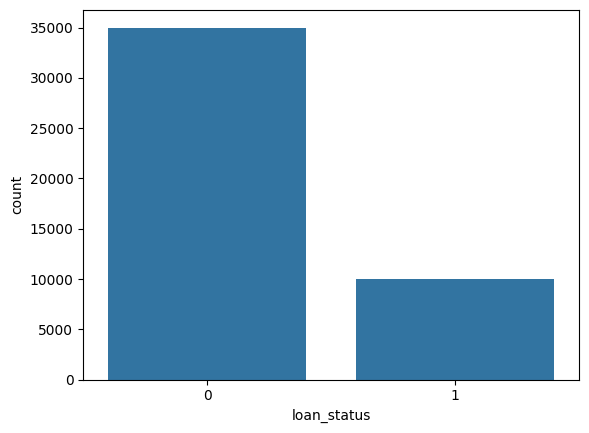

In [13]:
sns.countplot(x="loan_status",data=df)


Objective: Combine the resampled features and target into a new balanced DataFrame.

Use: The resampled data (with balanced classes) is stored back in a new DataFrame. This ensures the model is trained on a balanced dataset.

In [14]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
import pandas as pd

#Assuming df is your DataFrame with 'loan Status' as the target variable
x=df.drop('loan_status', axis=1)
y=df['loan_status']

#Create an oversampler object (choose either RandomOverSampler or SMOTE)
#Uncomnt the one you wish to use:
ros=RandomOverSampler()  # For Random Over Sampling
ros=SMOTE()    # For Synthetic Minority OverSampling

#Apply OverSampler to the data
x_resampled,y_resampled=ros.fit_resample(x,y)


#Create a new DataFrame with resampled data
#Ensure x_resampled is a DataFrame and y_resampled is Series to allow concatention

# X_RESAMPLED=pd.DataFrame(x_resampled,columns=x.columns)
# Y_RESAMPLED=pd.Series(y_resampled,name='loan_status'])

df=pd.concat([x_resampled,y_resampled],axis=1)
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.000000,0,4,71948.000000,0,3,35000.000000,4,16.020000,0.490000,3.000000,561,0,1
1,21.000000,0,3,12282.000000,0,2,1000.000000,1,11.140000,0.080000,2.000000,504,1,0
2,25.000000,0,3,12438.000000,3,0,5500.000000,3,12.870000,0.440000,3.000000,635,0,1
3,23.000000,0,1,79753.000000,0,3,35000.000000,3,15.230000,0.440000,2.000000,675,0,1
4,24.000000,1,4,66135.000000,1,3,35000.000000,3,14.270000,0.530000,4.000000,586,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,29.653369,0,3,16734.270982,8,3,3951.946367,4,13.488734,0.240000,6.711140,649,0,1
69996,22.245953,0,1,12085.486363,1,3,2041.531775,1,14.420099,0.170000,3.000000,643,0,1
69997,24.000000,0,3,164065.514767,0,0,25000.000000,3,18.987097,0.150000,3.033233,605,0,1
69998,22.524080,0,1,16684.685615,0,3,2447.591978,3,13.531394,0.144759,3.000000,629,0,1


# Visualize Resampled Loan Status Distribution (Count Plot):

Objective: Visualize the distribution of loan_status after resampling.

Use: After resampling, the class distribution should be more balanced. This plot helps confirm that the resampling worked as expected.

<Axes: xlabel='loan_status', ylabel='count'>

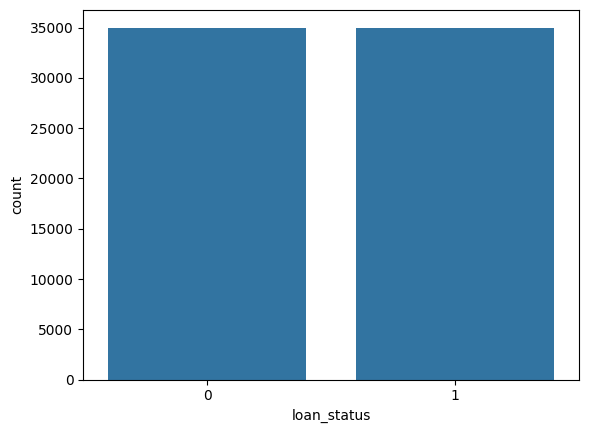

In [15]:
sns.countplot(x="loan_status",data=df)

# 5. Correlation Analysis


Objective: Visualize the distribution of loan_status after resampling.

Use: After resampling, the class distribution should be more balanced. This plot helps confirm that the resampling worked as expected.

In [16]:
correlation=df.corr()

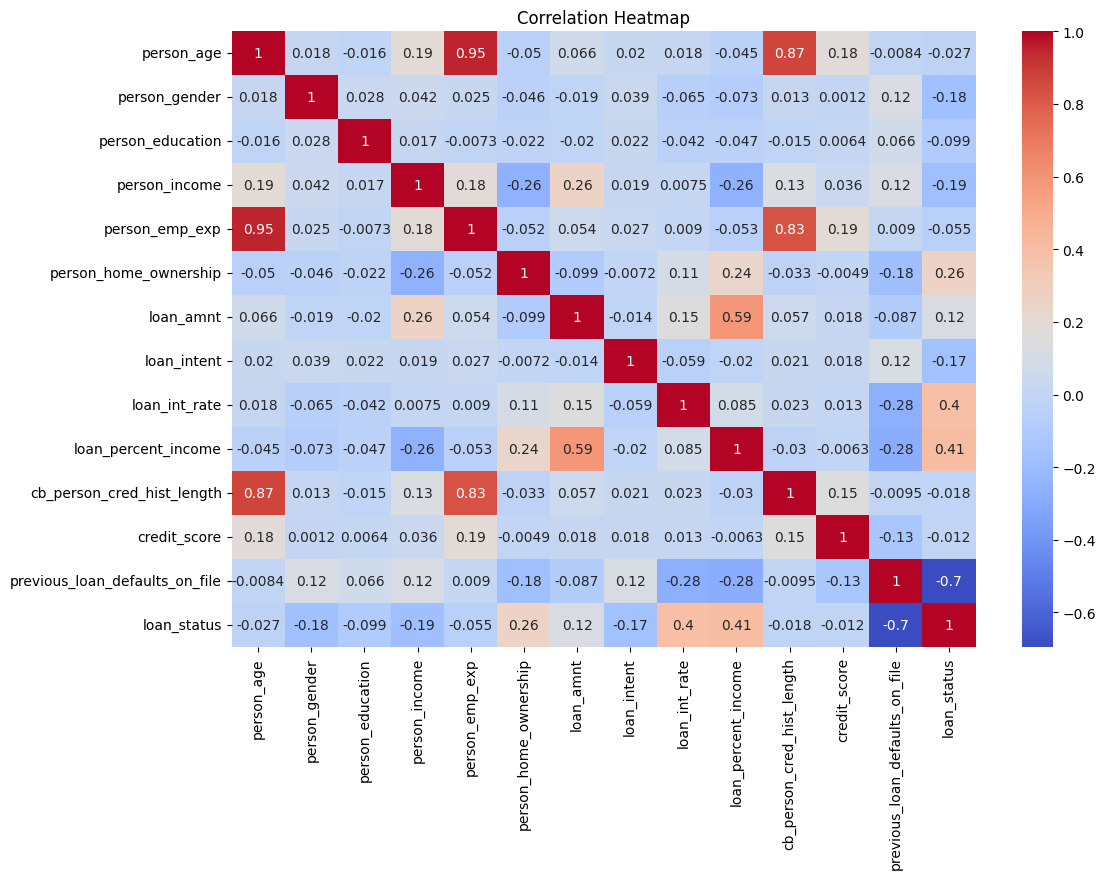

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation,annot=True,cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()



# . Plot Histograms of Data Distribution:

Objective: Plot histograms for all numerical features to visualize their distribution.

Use: Histograms help identify skewness, outliers, or abnormal distributions that may require transformation or further handling.

array([[<Axes: title={'center': 'person_age'}>,
        <Axes: title={'center': 'person_gender'}>,
        <Axes: title={'center': 'person_education'}>,
        <Axes: title={'center': 'person_income'}>],
       [<Axes: title={'center': 'person_emp_exp'}>,
        <Axes: title={'center': 'person_home_ownership'}>,
        <Axes: title={'center': 'loan_amnt'}>,
        <Axes: title={'center': 'loan_intent'}>],
       [<Axes: title={'center': 'loan_int_rate'}>,
        <Axes: title={'center': 'loan_percent_income'}>,
        <Axes: title={'center': 'cb_person_cred_hist_length'}>,
        <Axes: title={'center': 'credit_score'}>],
       [<Axes: title={'center': 'previous_loan_defaults_on_file'}>,
        <Axes: title={'center': 'loan_status'}>, <Axes: >, <Axes: >]],
      dtype=object)

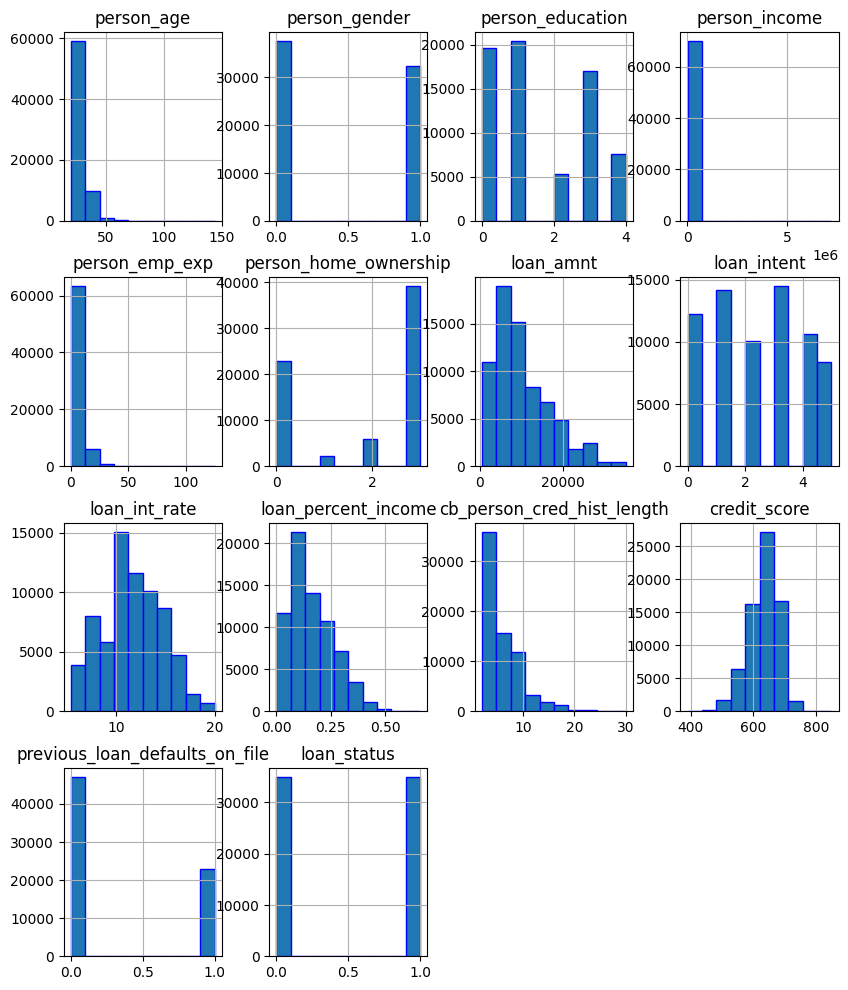

In [18]:
df.hist(edgecolor="b",figsize=[10,12])

# Drop Irrelevant or Redundant Features:

Objective: Remove columns that are irrelevant or redundant for model training.

Use: Dropping these features reduces the dataset’s complexity and ensures that the model only uses the most relevant features for prediction.

In [19]:
df.drop(["credit_score","person_age","person_education","person_emp_exp",'cb_person_cred_hist_length'],axis=1,inplace=True)


# Display New Shape After Dropping Features:

In [20]:
df.shape

(70000, 9)

# Plot Correlation Heatmap

Objective: Plot the correlation heatmap again after feature selection.

Use: This ensures that the remaining features are well-correlated and that no redundant features are included in the model.

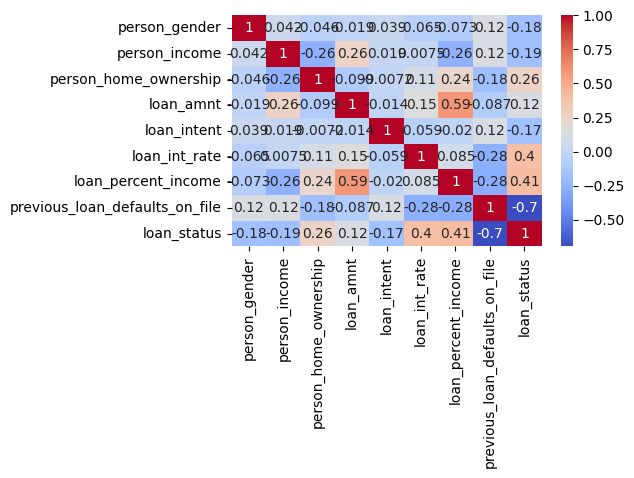

In [21]:
x = df.corr()
plt.figure(figsize = (5, 3))
sns.heatmap(x, annot = True, cmap = 'coolwarm')

plt.show()


# Box Plot Visualization

Objective: Visualize the distribution and potential outliers of the features using box plots.

Use: Box plots help identify outliers, which may need to be handled to prevent them from affecting model performance.

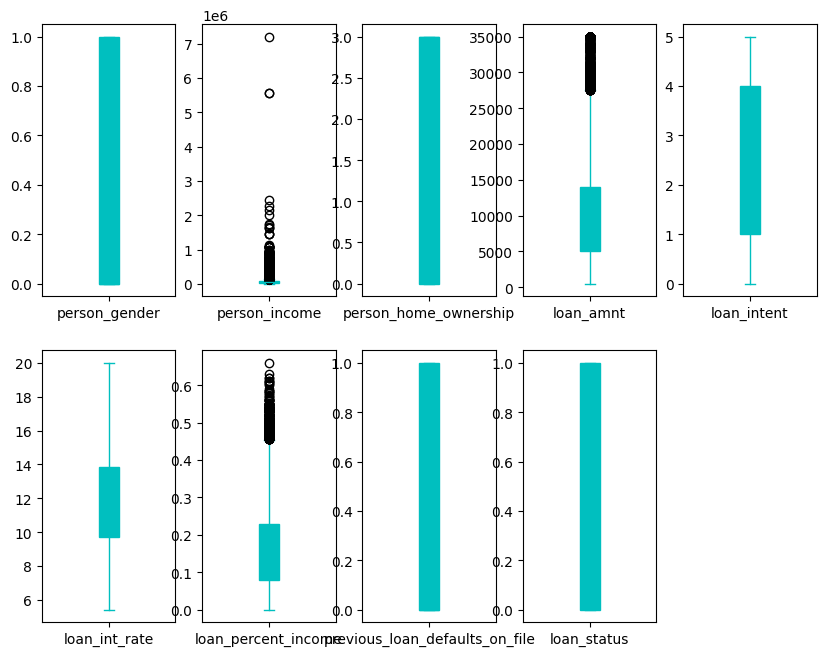

In [22]:

df.plot(kind = 'box', subplots = True, layout = (3, 5), figsize = (10, 12), color = 'c', patch_artist = True)
plt.show()

# Handling Skewness:

Objective: Apply a log transformation to reduce skewness.

Use: The log transformation makes the data more normally distributed by reducing the impact of extreme values. This is important for improving model performance.


In [ ]:
data=np.log(df+1)


Objective: Visualize the distribution of the log-transformed data.

Use: This ensures that the log transformation has improved the normality of the feature distributions.

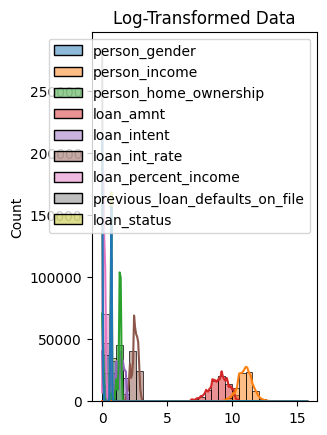

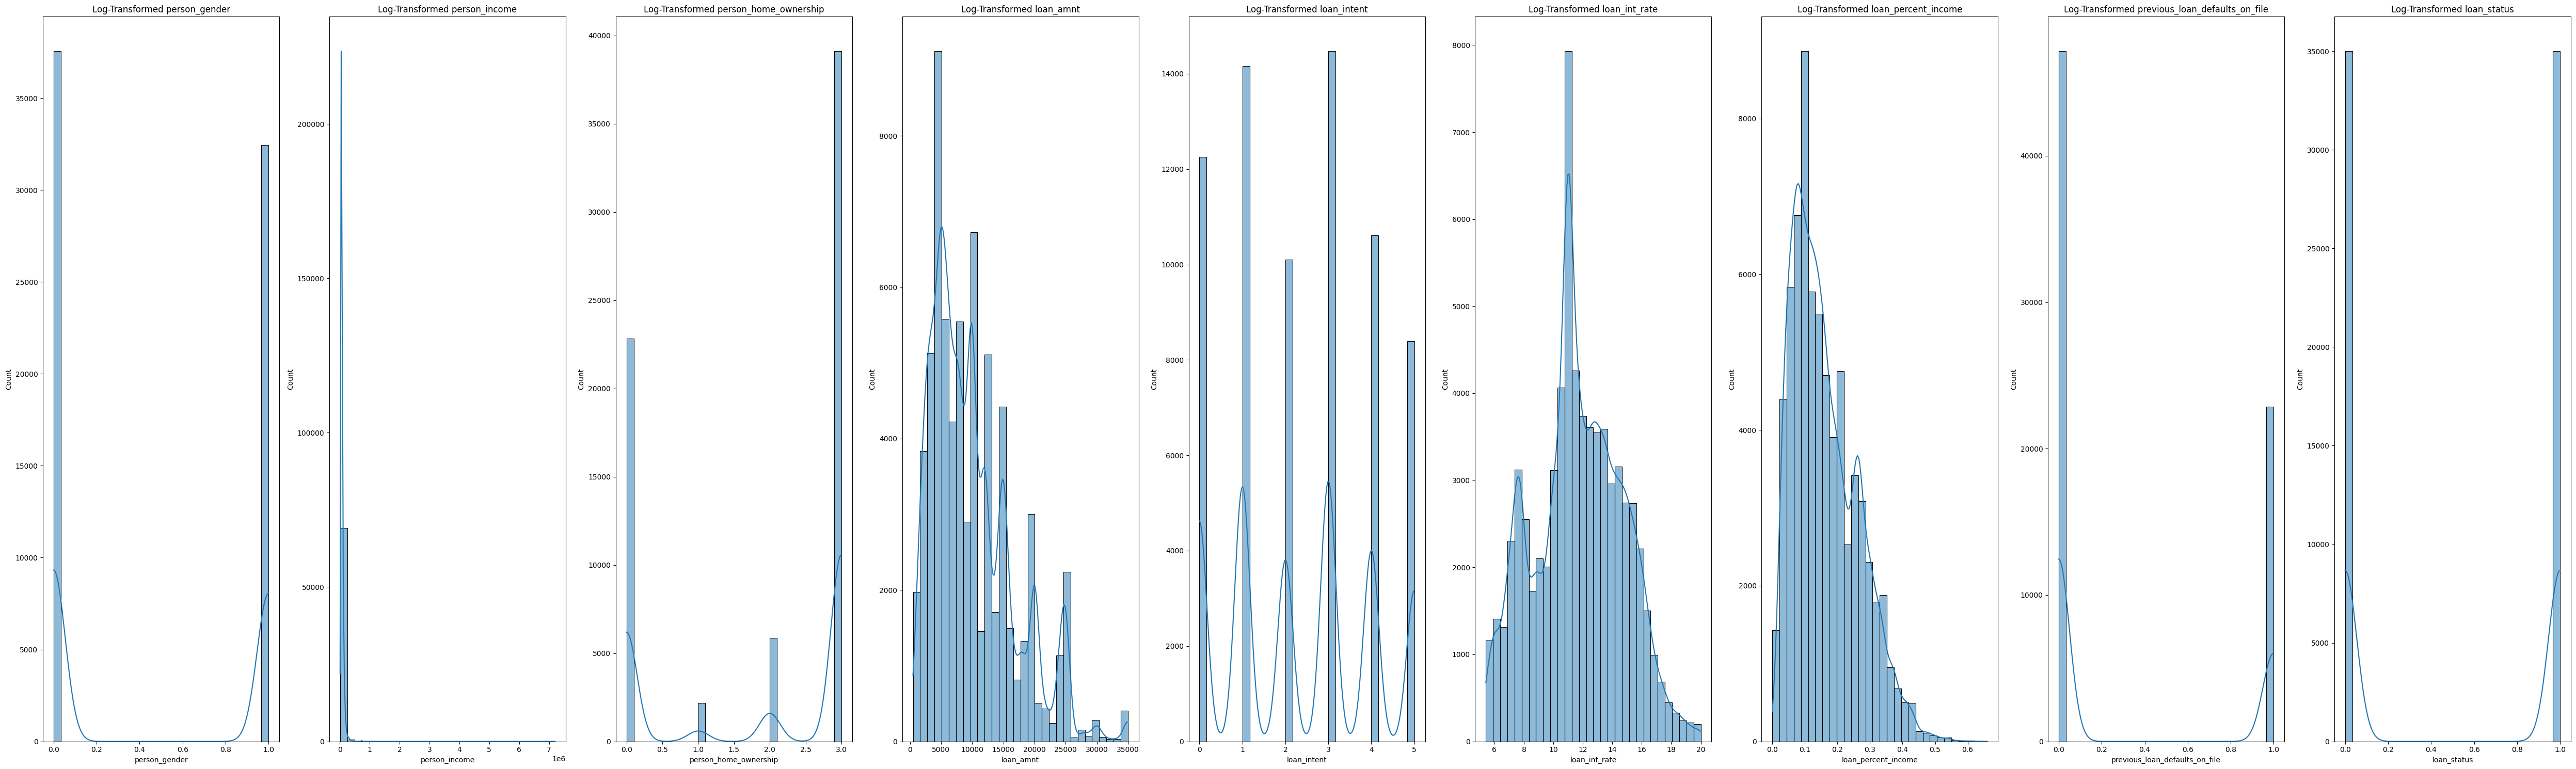

In [23]:
# Plotting log-transformed data distribution
plt.subplot(1,2,2)
sns.histplot(data, bins=30, kde=True)
plt.title("Log-Transformed Data")
plt.show()

# Assuming df is a DataFrame with multiple features
num_features = df.shape[1]  # Number of features
plt.figure(figsize=(50, 15))  # Adjust the figure size as needed

for i, column in enumerate(df.columns, 1):
    plt.subplot(1, num_features, i)  # Adjust layout for each feature
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f"Log-Transformed {column}")

plt.tight_layout()
plt.show()


# Feature and Target Selection

Objective: Separate the features (x) and the target variable (y).

Use: x contains all input features, while y contains the target variable, loan_status. This is essential for training the machine learning model.

In [24]:
data['loan_status'] = (data['loan_status'] > 0.5).astype(int)
x = data.drop('loan_status', axis = 1)
y = data['loan_status']


In [25]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier,LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [26]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)


Objective: Split the data into training and testing sets.

Use: The train_test_split() function ensures that the model is trained on one portion of the data and evaluated on a separate portion, which helps prevent overfitting.

# Model Training

Objective: Train a machine learning model using Random Forest.

Use: Random Forest is an ensemble learning method that builds multiple decision trees and aggregates their predictions. It is a powerful model for classification tasks like loan approval prediction.

In [27]:
model = RandomForestClassifier()
model.fit(x_train, y_train)


RandomForestClassifier()

# Predictions

Objective: Generate predictions using the trained model.

Use: The trained model is used to predict the loan_status on the test data (x_test).

In [28]:
y_pred = model.predict(x_test)
y_pred


array([1, 1, 0, ..., 0, 1, 1])

In [29]:

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average = "weighted"))
print('Recall:', recall_score(y_test, y_pred, average = "weighted"))
print('F1 Score:', f1_score(y_test, y_pred, average = "weighted"))


Accuracy: 0.9315
Precision: 0.9320283277768245
Recall: 0.9315
F1 Score: 0.9314832662606138


Objective: Evaluate the performance of the model.

Use: These metrics (accuracy, precision, recall, and F1 score) provide a comprehensive assessment of the model’s performance, with particular focus on its ability to classify both approved and rejected loans accurately.

In [30]:
df.head()

,person_gender,person_income,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,previous_loan_defaults_on_file,loan_status
0,0,71948.0,3,35000.0,4,16.02,0.49,0,1
1,0,12282.0,2,1000.0,1,11.14,0.08,1,0
2,0,12438.0,0,5500.0,3,12.87,0.44,0,1
3,0,79753.0,3,35000.0,3,15.23,0.44,0,1
4,1,66135.0,3,35000.0,3,14.27,0.53,0,1


In [35]:
person_gender                  = float(input("Enter person_gender : "))
person_income                  = float(input("Enter person_income : "))
person_home_ownership          = float(input("Enter person_home_ownership : "))
loan_amnt                      = float(input("Enter loan_amnt : "))
loan_intent                    = float(input("Enter loan_intent  : "))
loan_int_rate                  = float(input("Enter loan_int_rate  : "))
loan_percent_income            = float(input("Enter loan_percent_income : "))
previous_loan_defaults_on_file = float(input("Enter previous_loan_defaults_on_file : "))

user_input = [[person_gender,person_income, person_home_ownership, loan_amnt,loan_intent, loan_int_rate, loan_percent_income, previous_loan_defaults_on_file]]
loan_status = model.predict(user_input)
print("loan_status : ",loan_status)

Enter person_gender : 0
Enter person_income : 12282.0
Enter person_home_ownership : 2
Enter loan_amnt : 1000.0
Enter loan_intent  : 1
Enter loan_int_rate  : 11.14
Enter loan_percent_income : 0.08
Enter previous_loan_defaults_on_file : 1
loan_status :  [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
